# HP filter

In [40]:
import numpy as np
from scipy.linalg import inv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['lines.linewidth'] = 2

In [23]:
# HP filter function

def HPfilter(Y, λ):
    """
    Hodrick-Prescott filter. λ is a smooth parameter.
    Y can be a matrix
    """
    T=len(Y)
    K=np.eye(N=T-2,M=T,k=0)+(-2)*np.eye(N=T-2,M=T,k=1)+np.eye(N=T-2,M=T,k=2)
    I=np.identity(T)
    trend=inv(I+λ*(K.T)@K) @ Y
    output_gap=(Y-trend)/trend
    
    return trend, output_gap

In [32]:
data = pd.read_excel('US_data_py.xlsx', index_col=0, sheet_name='data')

In [33]:
data

,Period,output,consumption,investment,hours worked,employment,avg weekly hours,output per hour
Year,,,,,,,,
1961,Q01,3255.9,2064.441922,344.502789,56.023,49.716,112.685,31.029
1961,Q02,3311.2,2093.753658,350.165009,55.379,49.417,112.064,32.030
1961,Q03,3374.7,2098.377514,358.556319,55.774,49.603,112.441,32.476
1961,Q04,3440.9,2132.631586,369.880761,56.319,49.925,112.809,32.786
1962,Q01,3502.3,2151.832199,376.971290,56.899,50.364,112.976,33.097
...,...,...,...,...,...,...,...,...
2019,Q04,19215.7,11493.200000,3425.700000,112.870,113.900,99.096,108.379
2020,Q01,18989.9,11344.200000,3399.500000,111.405,112.911,98.666,107.883
2020,Q02,17378.7,10208.600000,3121.300000,97.152,99.099,98.035,110.305


In [34]:
Y=np.array(data)

In [35]:
Y1=Y[:,1:]

In [36]:
Y1

array([[3255.9, 2064.4419220000004, 344.5027885, ..., 49.716, 112.685,
        31.029],
       [3311.2, 2093.7536585, 350.1650095, ..., 49.417, 112.064, 32.03],
       [3374.7, 2098.377514, 358.55631900000003, ..., 49.603, 112.441,
        32.476],
       ...,
       [17378.7, 10208.6, 3121.3, ..., 99.099, 98.035, 110.305],
       [18743.7, 11027.1, 3327.4, ..., 105.358, 99.37, 112.263],
       [18924.3, 11139.0, 3459.2, ..., 107.184, 99.992, 111.293]],
      dtype=object)

In [37]:
[tr, cy]=HPfilter(Y1, 1600)

<function matplotlib.pyplot.show(close=None, block=None)>

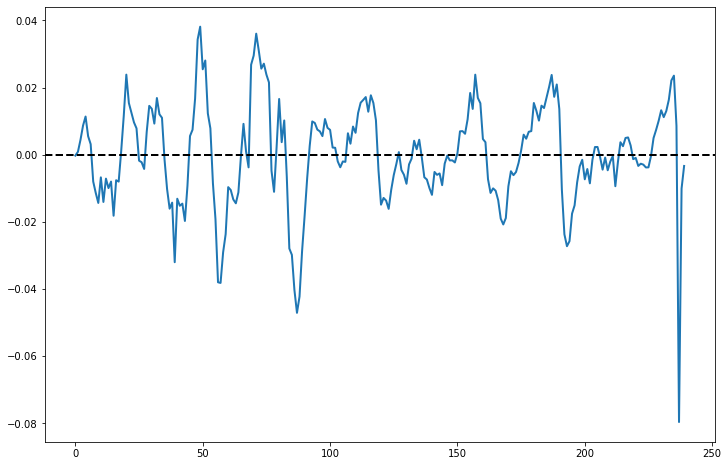

In [45]:
# graph

T=len(cy)
time=np.linspace(0,T-1,T)

plt.plot(time,cy[:,0])
plt.axhline(0,ls='--',c='black')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

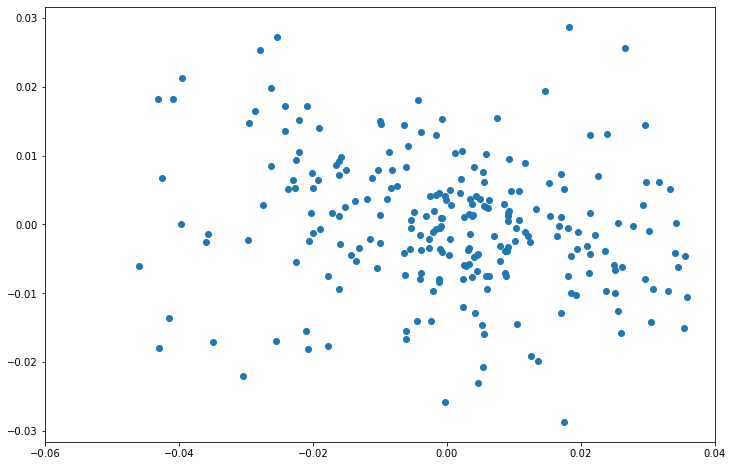

In [47]:
fig, ax = plt.subplots()
ax.scatter(cy[:,3], cy[:,6])
ax.xlim([-0.06,0.04])
ax.xlabel
ax.show